In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# from numba import jit

from utils import *
#from benchmark_utils import print_dict, score_ts

from models import *


%load_ext autoreload
%autoreload 2

# Make demonstration dataset

"Detection of periodic driving in nonautonomous difference equations"

# Discrete-time examples

In [ ]:
## test: try burying a signal in noise

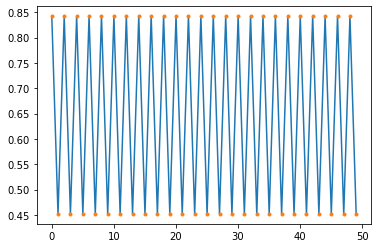

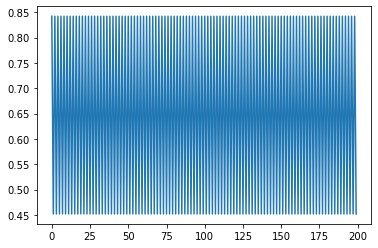

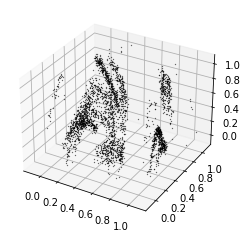

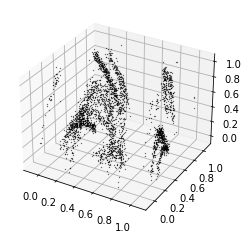

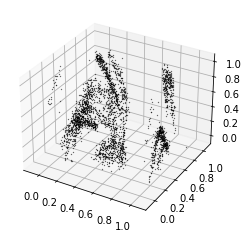

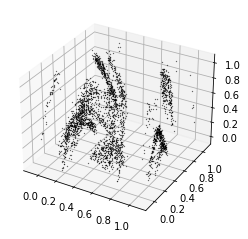

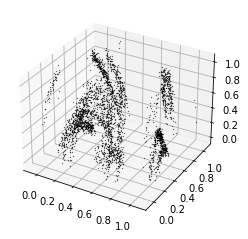

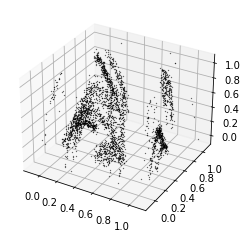

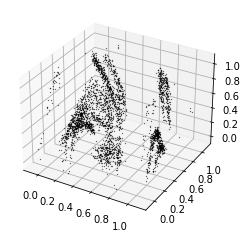

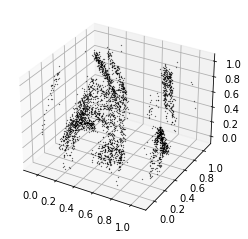

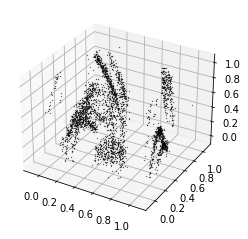

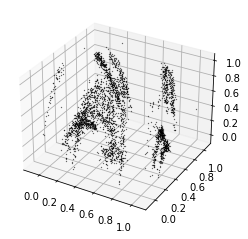

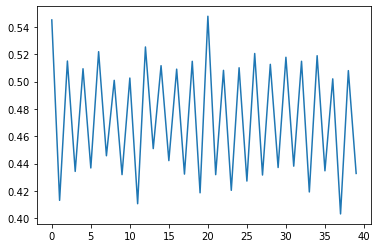

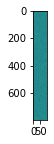

In [60]:
# neighbors ~ eps^3
# noise ~ neighbors ?
# noise ~ eps


# k_neighbors = 5
# volume_eps = (4/3) * np.pi * eps**3
# local_dist = np.mean(np.sort(dist_mat_min, axis=0)[:k_neighbors])
# point_density = k_neighbors / (4/3) * np.pi * local_dist**3
# expected_neighbors = point_density * volume_eps

# noise_distance = 0.1
# volume_noise = (4/3) * np.pi * noise_distance**3



n_sys = 400*2

np.random.seed(0)
curr = (np.random.random(5), 0.5)

# lamvals = np.array([3.81, 3.82, 3.83, 3.84+.04, 3.87, 3.865, 3.8155, 3.8552, 3.8255])
# lamvals = 3.81 + np.random.random(4) * 0.08
lamvals = 3.81 + np.random.random(n_sys) * 0.08 * 2
def xn(x, d, lam=lamvals):
    return np.mod((lam * x * (1 - x) + 0.45 * d), 1.0)

feigenbaum = 4.669201609102990671853203820466

lam2 = 3.4
lam3 = 3.82842712
lam4 = 3.5
lam5 = 3.73817237
lam6 = 3.6266
lam6 = 3.62655316
lam7 = 3.70164076
lam8 = 3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221

lamc = lam8 + 0.03

# https://mathworld.wolfram.com/LogisticMap.html
lam_double = [3, 
              3.44948974278317809819728407470589139196594748065667012843269256725096037745731502653985943310464023481,
              3.54409035955192285361596598660480454058309984544457367545781253030584294285886301225625856642489179996,
              3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221, 
              ]

# def valnext(x, d, lam0=lam8, noise=0.016): # for clique graphs
# def valnext(x, d, lam0=lam8, noise=0.025):
def valnext(x, d, lam0=lam2, noise=0.04):
# def valnext(x, d, lam0=lam4, noise=0.0): 
    """
    Find the next value in a driven chaotic logistic map. Brownian noise is applied to
    the subsystems but not the driving signal
    """
    dn_val = lam0 * d * (1 - d)
    xn_val = xn(x, d) + noise * np.random.normal(size=x.shape)
    return xn_val, dn_val
np.random.seed(0)
curr = (np.random.random(len(lamvals)), 0.5)



# def xn(x, d, a1=3.2, b1=0.1, a2=0.1, b2=0.1):
#     x1n = a1 * x[0] * (1 - x[0]) + b1
#     x2n = np.mod(a2 * np.sin(6 * np.pi * x[1]) + x[1] + 1/3+ b2 * x[0], 1)
#     return np.array([x1n, x2n])

# def valnext(x, d, w=0.06*2*np.pi):
#     dn_val = np.mod(x + w, 1)
#     xn_val = xn(x, d)
#     return xn_val, dn_val
# np.random.seed(0)
# curr = (0.1*np.random.random(2), 0.5)

vals = [curr]
for i in range(3200):
    curr = valnext(*curr)
    vals.append(curr)
# vals = np.array(vals)[200:]
vals_drive = np.array([item[1] for item in vals])[200:]
vals_response = np.array([item[0] for item in vals])[200:, :]
# vals_response += (np.random.random(vals_response.shape) - 0.5)*0.07

## Make reconstructions with m = 3
m = 3
all_attractors = list()
for row in vals_response.T:
    embedding = list()
    for i in range(m):
        embedding.append(row[i : i - m])
    embedding = np.vstack(embedding).T
    all_attractors.append(embedding)
all_attractors = np.array(all_attractors)

## Plot attractors

plt.figure()
plt.plot(vals_drive[-50:])
plt.plot(vals_drive[-50:], '.')

plt.figure()
plt.plot(vals_drive[-200:])

for attractor in all_attractors[:10]:
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(attractor[:, 0], attractor[:, 1], attractor[:, 2], '.k', markersize=0.5)

    
plt.figure()
plt.plot(np.mean(vals_response, axis=-1)[:40])

plt.figure(figsize=(40, 2))
plt.imshow(vals_response[:100].T)

## Reconstruct signal using discrete clusterng

Adj Rand: 0.027584673982199354


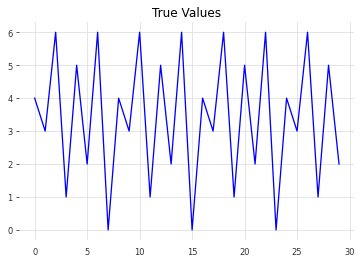

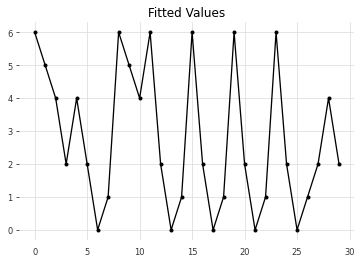

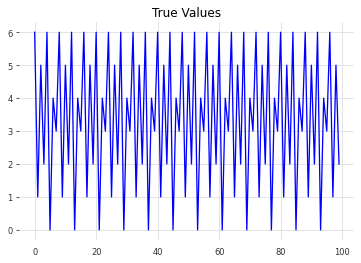

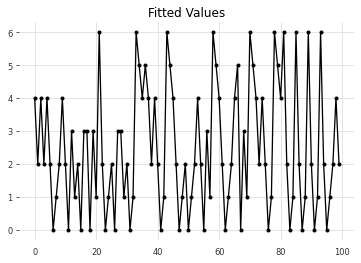

In [88]:

## doubling cycles collapse with noise


n = vals_response.shape[-1]
model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
np.random.seed(0)
# label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), n, replace=False)])
# label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), 400, replace=False)])
# label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), 3, replace=False)])

true_vals = discretize_signal(vals_drive)




n_plt = 30
plt.figure()
plt.plot(true_vals[-n_plt:],'-b')
plt.title("True Values")

plt.figure()
plt.plot(label_vals[-n_plt:],'-k')
plt.plot(label_vals[-n_plt:],'.k')
plt.title("Fitted Values")

n_plt = 100
plt.figure()
plt.plot(true_vals[-n_plt:],'-b')
plt.title("True Values")

plt.figure()
plt.plot(label_vals[-n_plt:],'-k')
plt.plot(label_vals[-n_plt:],'.k')
plt.title("Fitted Values")

# plt.figure()
# plt.plot(sol_response[0, :n_plt, 0],'-k')

# plt.figure()
# plt.plot(sol_drive[:n_plt,0],'-k')

# plt.figure()
# plt.plot(sol_drive[:n_plt, 0], label_vals[:n_plt], 'k')


from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score
# print("Rand:", rand_score(true_vals, label_vals))
print("Adj Rand:", adjusted_rand_score(true_vals, label_vals))
# print(completeness_score(true_vals, label_vals)) # good
# print(homogeneity_score(true_vals, label_vals))


# Sweep tolerance

0.001 0.5221545379631203
0.05357894736842105 0.7092914707912809
0.1061578947368421 0.7092914707912809
0.15873684210526315 0.7092914707912809
0.2113157894736842 0.7092914707912809
0.26389473684210524 0.7092914707912809
0.3164736842105263 0.3114522957807104
0.36905263157894735 0.3114522957807104
0.4216315789473684 0.31108362597911393
0.47421052631578947 0.31108362597911393
0.5267894736842105 0.31174933454380643
0.5793684210526315 0.31174933454380643
0.6319473684210526 0.31174933454380643
0.6845263157894736 0.31174933454380643
0.7371052631578947 0.31174933454380643
0.7896842105263158 0.31174933454380643
0.8422631578947368 0.31174933454380643
0.8948421052631579 0.31108362597911393
0.9474210526315789 0.31108362597911393
1.0 0.31174933454380643


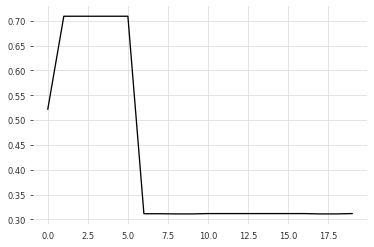

In [48]:

tol_vals = np.linspace(1e-3, 1, 20)
all_vals = list()
all_scores = list()
for tol in tol_vals:
    model = RecurrenceClustering(resolution=1.0, tolerance=tol, random_state=1)
    np.random.seed(0)
    label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), n, replace=False)])
    score = adjusted_rand_score(true_vals, label_vals)
    
    all_vals.append(label_vals)
    all_scores.append(score)
    
    print(tol, score, flush=True)
    
plt.plot(all_scores)

# np.array(all_scores).dump("tolerance_scan_noise_0.pkl")

# np.array(all_scores).dump("tolerance_scan_noise_p02.pkl")

# Sweep noise

In [62]:
## Sweep noise

from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score


all_scores = list()
all_amats = list()
np.random.seed(0)
n = 100
sel_inds = np.random.choice(np.arange(n), n, replace=False)
sel_inds = sel_inds[:100]
#0, .2

noise_vals = np.logspace(-4, 1, 20)

for noise_val in noise_vals:

    np.random.seed(0)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr, noise=noise_val)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1, store_adjacency_matrix=True)
    label_vals = model.fit_predict( vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    score = adjusted_rand_score(true_vals, label_vals)
    all_scores.append(score)
    print(score, flush=True, end=" ")

    all_amats.append(np.copy(model.adjacency_matrix))

0.3320761149959965 0.9933519783145535 0.9960062143903858 0.9926895293083893 0.9867474686066317 0.9913619646249635 0.9953419893649296 0.9946782083434125 0.9946759892166352 0.9960044389746988 0.9966695534835044 0.9973351102228144 0.9906884361812468 6.2222401602865406e-06 -3.9631839129081325e-06 -4.360102721977719e-07 -2.647147648347534e-06 -1.760916291871909e-06 -2.207286432245217e-06 -3.5330837850188254e-06 

In [3]:
from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score

noise_vals = np.logspace(-4, 1, 20)
n_val = 100
n_reps = 10 # number of times to replicate each point

lam_vals = [3.4, 3.5, 
3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221, 
3.59440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221]

import itertools
all_results = dict()
n = vals_response.shape[-1]
for params in itertools.product(np.arange(n_reps), lam_vals, noise_vals):
    
    rep_iter, lam_val, noise_val = params
    rep_iter = int(rep_iter) + 737

    def xn(x, d, lam=lamvals):
        return np.mod((lam * x * (1 - x) + 0.45 * d), 1.0)

    def valnext(x, d, lam0=lam_val, noise=0.04):
        """
        Find the next value in a driven chaotic logistic map. Brownian noise is applied to
        the subsystems but not the driving signal
        """
        dn_val = lam0 * d * (1 - d)
        xn_val = xn(x, d) + noise * np.random.normal(size=x.shape)
        return xn_val, dn_val
    
    np.random.seed(rep_iter)
    sel_inds = np.random.choice(np.arange(n), n_val, replace=False)
    np.random.seed(rep_iter)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr, noise=noise_val)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=(1 + rep_iter))
    label_vals = model.fit_predict(vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    
    score = adjusted_rand_score(true_vals, label_vals)
    
    line_val = " ".join([str(item) for item in params] + [str(score)])
    # write line to file
    
    print(line_val, flush=True)
    with open('noise_sweep.txt', "a") as f:
        f.write(line_val + "\n")

/Users/williamgilpin/miniconda3/envs/shrec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0 3.4 0.0001 0.6629682749538273
0 3.4 0.00018329807108324357 0.9946782083434125
0 3.4 0.0003359818286283781 0.993348871178131
0 3.4 0.0006158482110660267 0.9920208633663748
0 3.4 0.0011288378916846883 0.9933519783145535
0 3.4 0.00206913808111479 0.9973359964507565
0 3.4 0.00379269019073225 0.9906999631672425
0 3.4 0.0069519279617756054 0.9946759892166352
0 3.4 0.012742749857031334 0.9960048832708965
0 3.4 0.023357214690901212 0.9973351090399966
0 3.4 0.04281332398719392 0.9973351090399966
0 3.4 0.07847599703514607 0.9973351102228144
0 3.4 0.14384498882876628 0.9906884361536753
0 3.4 0.26366508987303583 6.224909683631224e-06
0 3.4 0.4832930238571752 -3.5354502417380013e-06
0 3.4 0.8858667904100823 -1.756477813363079e-06
0 3.4 1.623776739188721 -3.537520693252847e-06
0 3.4 2.9763514416313193 -1.3257903222591875e-06
0 3.4 5.455594781168514 -2.200481304787425e-06
0 3.4 10.0 -2.6533601754992094e-06
0 3.5 0.0001 0.9982218260859068
0 3.5 0.00018329807108324357 0.9982220242096075
0 3.5 0.00033

KeyboardInterrupt: 

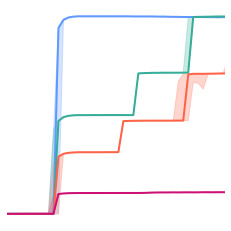

In [9]:
import pandas as pd
import degas as dg

tt = np.loadtxt("noise_sweep_vs_period.txt")
all_data = pd.DataFrame(tt, columns=["replicate", "doubling", "noise", "score"])



all_arrays = list()
rep_inds = np.sort(np.unique(all_data["replicate"].to_numpy()))[:-1]
all_arrays += [np.array(all_data[all_data["replicate"] == rep_ind][["doubling", "noise", "score"]]) for rep_ind in rep_inds]
ww = pd.DataFrame(np.median(np.array(all_arrays), axis=0), columns=["doublings", "noise", "score"])
ww["error"] = np.std(np.array(all_arrays), axis=0)[:, -1]
ww["error_lo"] = np.percentile(np.array(all_arrays), 50, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 25, axis=0)[:, -1]
ww["error_hi"] = np.percentile(np.array(all_arrays), 75, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 50, axis=0)[:, -1]

double_vals = np.unique(ww["doublings"])

# plt.figure()
# plt.semilogx(ww[ww["doublings"] == double_vals[0]]["noise"],
#          ww[ww["doublings"] == double_vals[0]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[1]]["noise"],
#          ww[ww["doublings"] == double_vals[1]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[2]]["noise"],
#          ww[ww["doublings"] == double_vals[2]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[3]]["noise"],
#          ww[ww["doublings"] == double_vals[3]]["score"]
#         )



noise_amps = ww[ww["doublings"] == double_vals[0]]["noise"]





plt.figure()
dg.plot_err(
    ww[ww["doublings"] == double_vals[0]]["score"],
    # ww[ww["doublings"] == double_vals[0]]["error"],
    np.array([ww[ww["doublings"] == double_vals[0]]["error_lo"], ww[ww["doublings"] == double_vals[0]]["error_hi"]]).T,
    x=snr_db,
    color=dg.blue,
    linewidth=2,
)


dg.plot_err(
    ww[ww["doublings"] == double_vals[1]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[1]]["error_lo"], ww[ww["doublings"] == double_vals[1]]["error_hi"]]).T,
    x=snr_db,
    color=dg.turquoise,
    linewidth=2,
)

dg.plot_err(
    ww[ww["doublings"] == double_vals[2]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[2]]["error_lo"], ww[ww["doublings"] == double_vals[2]]["error_hi"]]).T,
    x=snr_db,
    color=dg.red,
    linewidth=2,
)

dg.plot_err(
    ww[ww["doublings"] == double_vals[3]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[3]]["error_lo"], ww[ww["doublings"] == double_vals[3]]["error_hi"]]).T,
    x=snr_db,
    color=dg.magenta,
    linewidth=2,
)

plt.xlim([0, 22])
dg.fixed_aspect_ratio(1)

dg.vanish_axes()
# dg.better_savefig('./private_writing/fig_resources/snr_scaling.pdf')



In [443]:
# ## Sweeps noise at several values of N

# from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score

# noise_vals = np.logspace(-4, 1, 20)
# n_vals = [3, 50, 100] # the range of n values to check

# # n_vals = [10, 400] # the range of n values to check

# n_reps = 10 # number of times to replicate each point


# import itertools
# all_results = dict()
# n = vals_response.shape[-1]
# for params in itertools.product(np.arange(n_reps), n_vals, noise_vals):
    
#     rep_iter, n_val, noise_val = params
#     rep_iter = int(rep_iter) + 737
    
#     np.random.seed(rep_iter)
#     sel_inds = np.random.choice(np.arange(n), n_val, replace=False)
#     np.random.seed(rep_iter)
#     curr = (np.random.random(len(lamvals)), 0.5)
#     vals = [curr]
#     for i in range(3200):
#         curr = valnext(*curr, noise=noise_val)
#         vals.append(curr)
#     vals_drive = np.array([item[1] for item in vals])[200:]
#     vals_response = np.array([item[0] for item in vals])[200:, :]

    
#     model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=(1 + rep_iter))
#     label_vals = model.fit_predict(vals_response[:, sel_inds])
#     true_vals = discretize_signal(vals_drive)
    
#     score = adjusted_rand_score(true_vals, label_vals)
    
#     line_val = " ".join([str(item) for item in params] + [str(score)])
#     # write line to file
    
#     print(line_val, flush=True)
#     with open('test3_2.txt', "a") as f:
#         f.write(line_val + "\n")
        
#     #break

0 3 0.0001 0.42745976251772144
0 3 0.00018329807108324357 0.4451358821016434
0 3 0.0003359818286283781 0.4240629733054764
0 3 0.0006158482110660267 0.40359447561200223
0 3 0.0011288378916846883 0.2945594630329921
0 3 0.00206913808111479 0.5013369765412543
0 3 0.00379269019073225 0.385270024795888
0 3 0.0069519279617756054 0.3538630535562145
0 3 0.012742749857031334 0.2517143196959593
0 3 0.023357214690901212 0.3092130776734012
0 3 0.04281332398719392 0.24035590398925968
0 3 0.07847599703514607 0.06149802045758184
0 3 0.14384498882876628 0.005415153967066525
0 3 0.26366508987303583 -0.0002230776066363218
0 3 0.4832930238571752 -0.000862544487901378
0 3 0.8858667904100823 -0.0004119075249564843
0 3 1.623776739188721 -0.00041904756022430925
0 3 2.9763514416313193 -0.00016401876537949742
0 3 5.455594781168514 7.357242129665408e-05
0 3 10.0 -0.00012231792091450065
0 50 0.0001 0.9973342216310781
0 50 0.00018329807108324357 0.9982220242096075
0 50 0.0003359818286283781 0.9955572391034765
0 50

In [133]:


# tt = np.loadtxt("test3.txt")

# all_data = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])

# ww = pd.concat([all_data[all_data["replicate"] == 0.0], all_data[all_data["replicate"] == 1.0]]).groupby(["num_samples", "noise"], as_index=False)["score"].mean()

# plt.semilogx(ww[ww["num_samples"] == 3]["noise"],
#          ww[ww["num_samples"] == 3]["score"]
#         )


# plt.semilogx(ww[ww["num_samples"] == 10]["noise"],
#          ww[ww["num_samples"] == 10]["score"]
#         )


# plt.semilogx(ww[ww["num_samples"] == 50]["noise"],
#          ww[ww["num_samples"] == 50]["score"]
#         )

# plt.semilogx(ww[ww["num_samples"] == 100]["noise"],
#          ww[ww["num_samples"] == 100]["score"]
#         )

# xx = ww[ww["num_samples"] == 100]["noise"]

# # plt.semilogx(xx,
# #              1 - 
# #             )

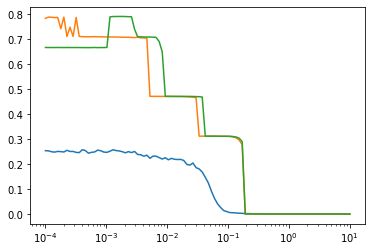

In [43]:
import pandas as pd

tt = np.loadtxt("sweep_noise3.txt")
tt[:, 0] += 100
tt = np.vstack([tt, np.loadtxt("sweep_noise2.txt")])

all_data = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])

all_arrays = list()
rep_inds = np.sort(np.unique(all_data["replicate"].to_numpy()))
all_arrays += [np.array(all_data[all_data["replicate"] == rep_ind][["num_samples", "noise", "score"]]) for rep_ind in rep_inds]
# ww = pd.DataFrame(np.mean(np.array(all_arrays), axis=0), columns=["num_samples", "noise", "score"])
ww = pd.DataFrame(np.median(np.array(all_arrays), axis=0), columns=["num_samples", "noise", "score"])
ww["error"] = np.std(np.array(all_arrays), axis=0)[:, -1]
ww["error_lo"] = np.percentile(np.array(all_arrays), 50, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 25, axis=0)[:, -1]
ww["error_hi"] = np.percentile(np.array(all_arrays), 75, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 50, axis=0)[:, -1]


plt.semilogx(ww[ww["num_samples"] == 3]["noise"],
         ww[ww["num_samples"] == 3]["score"]
        )

plt.semilogx(ww[ww["num_samples"] == 50]["noise"],
         ww[ww["num_samples"] == 50]["score"]
        )

plt.semilogx(ww[ww["num_samples"] == 100]["noise"],
         ww[ww["num_samples"] == 100]["score"]
        )

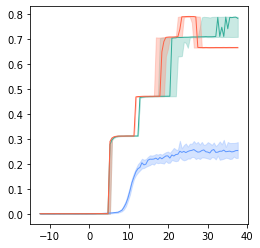

In [44]:
noise_amps = ww[ww["num_samples"] == 100]["noise"]
x_scale = np.mean(np.sqrt(np.mean(vals_response**2, axis=0)))
snr_db = 10 * np.log10(x_scale / noise_amps)


dg.plot_err(
    ww[ww["num_samples"] == 3]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["num_samples"] == 3]["error_lo"], ww[ww["num_samples"] == 3]["error_hi"]]).T,
    x=snr_db,
    color=dg.blue
)


dg.plot_err(
    ww[ww["num_samples"] == 50]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["num_samples"] == 50]["error_lo"], ww[ww["num_samples"] == 50]["error_hi"]]).T,
    x=snr_db,
    color=dg.turquoise
)

dg.plot_err(
    ww[ww["num_samples"] == 100]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["num_samples"] == 100]["error_lo"], ww[ww["num_samples"] == 100]["error_hi"]]).T,
    x=snr_db,
    color=dg.red
)

dg.fixed_aspect_ratio(1)

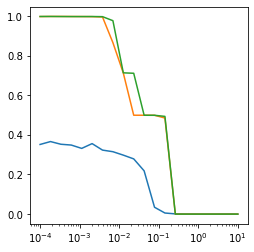

In [563]:
# import pandas as pd
# import degas as dg

# tt = np.loadtxt("test3.txt")
# all_data1 = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])
# all_data1 = pd.concat([all_data1[all_data1["num_samples"] == val] for val in [3, 50, 100]])
# tt = np.loadtxt("test3_2.txt")
# all_data2 = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])
# all_data2 = pd.concat([all_data2[all_data2["num_samples"] == val] for val in [3, 50, 100]])
# all_data = pd.concat([all_data1, all_data2])
# # ww = pd.concat([all_data[all_data["replicate"] == 0.0], all_data[all_data["replicate"] == 1.0]]).groupby(["num_samples", "noise"], as_index=False)["score"].mean()

# all_arrays = list()
# rep_inds = np.unique(all_data2["replicate"].to_numpy())
# all_arrays += [np.array(all_data2[all_data2["replicate"] == rep_ind][["num_samples", "noise", "score"]]) for rep_ind in rep_inds]
# rep_inds = np.unique(all_data1["replicate"].to_numpy())
# all_arrays += [np.array(all_data1[all_data1["replicate"] == rep_ind][["num_samples", "noise", "score"]]) for rep_ind in rep_inds]
# ww = pd.DataFrame(np.mean(np.array(all_arrays), axis=0), columns=["num_samples", "noise", "score"])
# ww["error"] = np.std(np.array(all_arrays), axis=0)[:, -1]

# plt.semilogx(ww[ww["num_samples"] == 3]["noise"],
#          ww[ww["num_samples"] == 3]["score"]
#         )


# # plt.semilogx(ww[ww["num_samples"] == 10]["noise"],
# #          ww[ww["num_samples"] == 10]["score"]
# #         )



# plt.semilogx(ww[ww["num_samples"] == 50]["noise"],
#          ww[ww["num_samples"] == 50]["score"]
#         )

# plt.semilogx(ww[ww["num_samples"] == 100]["noise"],
#          ww[ww["num_samples"] == 100]["score"]
#         )


# dg.fixed_aspect_ratio(1, semilogx=True)

[-1.64229153]
[-1.62766432  1.16084096]


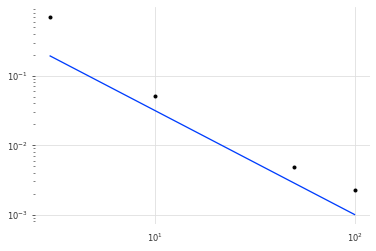

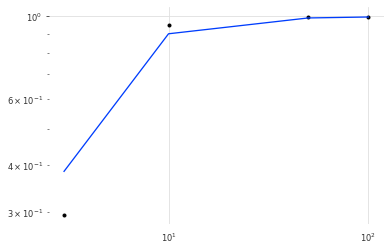

In [22]:
## Power law scaling of zero-noise accuracy with number of points

ee = np.array([(val, np.array(ww[ww["num_samples"] == val]["score"])[0]) for val in [3, 10, 50, 100]])

print(np.diff(np.log10(1 - ee[:, 1])[[0, -1]]) / np.diff(np.log10(ee[:, 0][[0, -1]])))
print(np.polyfit(np.log(ee[:, 0]), np.log(1 - ee[:, 1]), 1))

plt.figure()
plt.loglog(ee[:, 0], 1 - ee[:, 1], '.')
plt.loglog(ee[:, 0],  ee[:, 0]**(-3/2))

plt.figure()
plt.loglog(ee[:, 0], ee[:, 1], '.')
plt.loglog(ee[:, 0], 1 - np.exp(1.16084096) * ee[:, 0]**(-3/2))

[-1.64229153]
[-1.62766432  1.16084096]


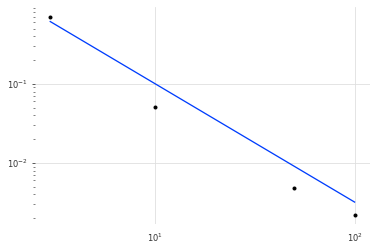

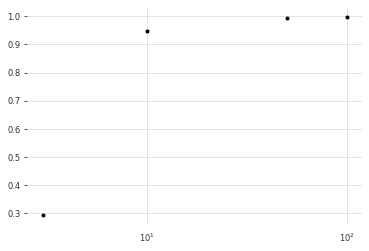

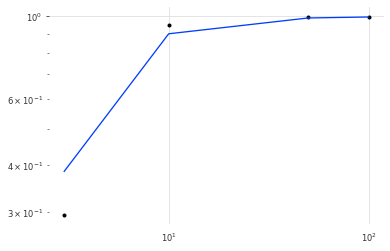

In [1159]:
## Power law scaling of accuracy with number of points

ee = np.array([(val, np.array(ww[ww["num_samples"] == val]["score"])[0]) for val in [3, 10, 50, 100]])

print(np.diff(np.log10(1 - ee[:, 1])[[0, -1]]) / np.diff(np.log10(ee[:, 0][[0, -1]])))
print(np.polyfit(np.log(ee[:, 0]), np.log(1 - ee[:, 1]), 1))

plt.figure()
plt.loglog(ee[:, 0], 1 - ee[:, 1], '.')
plt.loglog(ee[:, 0], np.exp(1.16084096) * ee[:, 0]**(-3/2))

plt.figure()
plt.loglog(ee[:, 0], ee[:, 1], '.')
plt.loglog(ee[:, 0], 1 - np.exp(1.16084096) * ee[:, 0]**(-3/2))

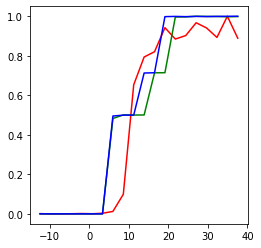

In [441]:
noise_amps = ww[ww["num_samples"] == 100]["noise"]
x_scale = np.mean(np.sqrt(np.mean(vals_response**2, axis=0)))
snr_db = 10 * np.log10(x_scale / noise_amps)

n_tpts = vals_response.shape[0]

plt.plot(snr_db, ww[ww["num_samples"] == 3]["score"] / np.max(ww[ww["num_samples"] == 3]["score"]), 'r')
plt.plot(snr_db, ww[ww["num_samples"] == 50]["score"] / np.max(ww[ww["num_samples"] == 50]["score"]), 'g')
plt.plot(snr_db, ww[ww["num_samples"] == 100]["score"] / np.max(ww[ww["num_samples"] == 100]["score"]), 'b')

# plt.plot(snr_db, ww[ww["num_samples"] == 3]["score"], 'r')
# plt.plot(snr_db, ww[ww["num_samples"] == 50]["score"], 'g')
# plt.plot(snr_db, ww[ww["num_samples"] == 100]["score"], 'b')


#plt.plot(snr_db, (1 - np.exp(-(x_scale / noise_amps)*.05)) * 0.65)


# plt.plot(snr_db, (1 - np.exp(-(x_scale / noise_amps) / np.sqrt(100))) * 0.65, 'k')

# a0 = np.exp(1.16084096)
# b0 = 0.05
# plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) * (1 - a0*(3)**(-3/2)), 'r')
# plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) * (1 - a0 * (50)**(-3/2)), 'g')
# plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) *  (1 - a0 * (100)**(-3/2)), 'b')

dg.fixed_aspect_ratio(1)

In [260]:


# tt


# tt = np.mean(np.dstack(np.split(tt, 2)), axis=-1)[:, 1:]

# plt.figure()
# plt.plot(tt[::6][:, 0], tt[::6][:, -1])

# plt.figure()
# plt.plot(tt[-2:][:, 1], tt[-2:][:, -1])

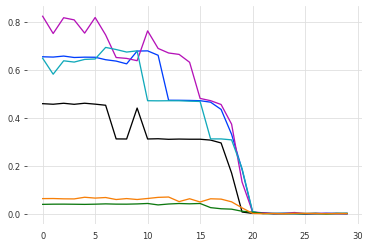

In [340]:
# Adjusted rand index versus noise

# nn2 = np.copy(all_scores)
plt.plot(nn2) # n = 10

# mm2 = np.copy(all_scores)
plt.plot(mm2) # 200

# pp2 = np.copy(all_scores)
plt.plot(pp2) # 400

# qq2 = np.copy(all_scores) 
plt.plot(qq2) # 100

#cc = np.copy(all_scores)
plt.plot(cc) # 100, strong chaos

# cc2 = np.copy(all_scores)
plt.plot(cc2) # 100, weak chaos

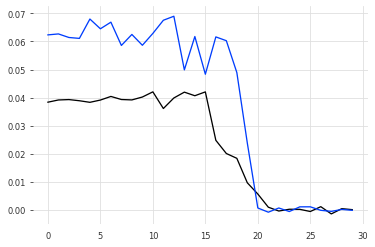

In [339]:
plt.plot(cc)
plt.plot(cc2)

In [167]:
nreps = 100
a = [1 , 2] * 4 * nreps
b = [1,2,3,4] * 2 * nreps
c = list(range(1, 8+1)) * nreps

adjusted_rand_score(c, a)

adjusted_rand_score(a, b)

print(adjusted_rand_score(a, b), rand_score(a, b))
print(adjusted_rand_score(b, c), rand_score(b, c))
print(adjusted_rand_score(a, c), rand_score(a, c))

0.4990595611285266 0.7496871088861077
0.5978862606945143 0.8748435544430538
0.24835371589840075 0.6245306633291614


# Sweep N the number of datasets

In [61]:
from sklearn.metrics import adjusted_rand_score, rand_score

n = vals_response.shape[-1]
all_scores = list()
sel_inds = np.random.choice(np.arange(n), n, replace=False)
sample_vals = vals_response[:, sel_inds]
nvals = list(range(3, n, 20))[::-1]

nvals = list(range(3, n, 1))

nvals = list(range(200, 500, 1))
# nvals = list(range(3, n, 40))[::-1]
# nvals = [3, 4, 10, 20, n // 2, n][::-1]
for i in nvals:

    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1+1+1)
    # model = RecurrenceClustering(resolution=1.0, tolerance=0.1, random_state=1)
    label_vals = model.fit_predict(sample_vals[:, :i])
    true_vals = discretize_signal(vals_drive)
    #score = rand_score(true_vals, label_vals)
    score = [adjusted_rand_score(true_vals, label_vals), rand_score(true_vals, label_vals)]
    all_scores.append(score)
    print(i, score, flush=True, end=" ")

all_scores = np.array(all_scores[::-1])
nvals = nvals[::-1]

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score

noise_vals = np.logspace(-4, 1, 20)
n_vals = list(range(3, n, 1))
n_reps = 60 # number of times to replicate each point

lam_vals = [3.4, 3.5, 
3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221, 
3.59440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221]

import itertools
all_results = dict()
n = vals_response.shape[-1]
for params in itertools.product(np.arange(n_reps), lam_vals, n_vals):
    
    rep_iter, lam_val, n_val = params
    rep_iter = int(rep_iter) + 737

    def xn(x, d, lam=lamvals):
        return np.mod((lam * x * (1 - x) + 0.45 * d), 1.0)

    def valnext(x, d, lam0=lam_val, noise=0.04):
        """
        Find the next value in a driven chaotic logistic map. Brownian noise is applied to
        the subsystems but not the driving signal
        """
        dn_val = lam0 * d * (1 - d)
        xn_val = xn(x, d) + noise * np.random.normal(size=x.shape)
        return xn_val, dn_val
    
    np.random.seed(rep_iter)
    sel_inds = np.random.choice(np.arange(n), n_val, replace=False)
    np.random.seed(rep_iter)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=(1 + rep_iter))
    label_vals = model.fit_predict(vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    
    score = adjusted_rand_score(true_vals, label_vals)
    
    line_val = " ".join([str(item) for item in params] + [str(score)])
    # write line to file
    
    print(line_val, flush=True)
    with open('noise_sweep.txt', "a") as f:
        f.write(line_val + "\n")

In [90]:
# all_scores2 = np.vstack([all_scores, all_scores[-50:][[sel_inds]]])
# all_scores2.dump("all_scores_period4_tolp01_noisep04_full.pkl")
# all_scores2.dump("all_scores_period8_tolp01_noisep04_full.pkl")
# all_scores2.dump("all_scores_period2_tolp01_noisep04_full.pkl")

In [29]:
np.vstack([all_scores, all_scores[-50:][[sel_inds]]]).shape

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_57202/1262868967.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.vstack([all_scores, all_scores[-50:][[sel_inds]]]).shape


(797, 2)

error rate ~ exp(-N) as N increases

How do we expect the error rate to change as we increase the number of samples?

How does expected value of distribution of error rates change with samples?




beta[a, b](p) ~ p^(a - 1) (1 - p)^(b - 1)  B(a, b)
+ mean of beta distribution is alpha / (alpha + beta) since that's just successes over total
+ If we have a fixed number of errors, we expect to see B stay constant as A + B grows
+ mean ~ A / (A + B) = 1 / (1 + B / A). If B is a constant, and A grows larger, then this approaches one

+ Free parameter is therefore B, the fixed number of errors that is getting diluted out



# Plot scaling with N

In [411]:

# all_scores_period2.dump("all_scores_period2.pkl")
# all_scores_period4.dump("all_scores_period4.pkl")
# all_scores_period8.dump("all_scores_period8.pkl")



# all_scores_period2 = np.load("all_scores_period2.pkl", allow_pickle=True)
# all_scores_period4 = np.load("all_scores_period4.pkl", allow_pickle=True)
# all_scores_period8 = np.load("all_scores_period8.pkl", allow_pickle=True)
# all_scores_period8_rep2 = np.load("all_scores_period8_rep2.pkl", allow_pickle=True)
# nvals = np.array(list(range(3, n, 20)))

all_scores_period2 = np.load("all_scores_period2_tolp01_noisep04_full.pkl", allow_pickle=True)
all_scores_period4 = np.load("all_scores_period4_tolp01_noisep04_full.pkl", allow_pickle=True)
all_scores_period8 = np.load("all_scores_period8_tolp01_noisep04_full.pkl", allow_pickle=True)
n = 800
nvals = np.arange(3, n, 1)



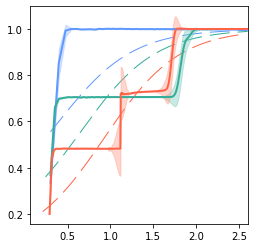

In [430]:

import degas as dg
import scipy.special

beta_mean = lambda a, b: a / (a + b)
beta_std = lambda a, b: np.sqrt(scipy.special.gamma(a) * scipy.special.gamma(b) / scipy.special.gamma(a + b))

plt.figure()
nvals2 = np.hstack([[1,2], nvals, np.arange(nvals[-1] + 1, nvals[-1] + 2000 + 1, 1)])
# plt.plot(np.log10(nvals2/2 + 0.3*2), 1 - beta_mean(2, nvals2/2 + 2), '--', color=dg.lighter(dg.blue, 0.7), linewidth=3)
# plt.plot(np.log10(nvals2/4 + 0.3*2), 1 - beta_mean(4, nvals2/4 + 2), '--', color=dg.lighter(dg.turquoise, 0.7), linewidth=3)
# plt.plot(np.log10(nvals2/8 + 0.3*2), 1 - beta_mean(8, nvals2/8 + 2), '--', color=dg.lighter(dg.red, 0.7), linewidth=3)

vals = np.copy(all_scores_period2[:, 0])
vals = vals  / np.mean(vals [-50:])
# vals = np.hstack([vals[:-700], gaussian_filter(vals[-700:], 20)])
# plt.plot(nvals / 2, vals, color=dg.turquoise)
xx = np.linspace(0, 1, len(vals))
vals_shift = np.array([np.interp(xx, (1. + 0.2*np.random.normal()) * xx, vals) for i in range(1000)])
vals_errs = np.std(vals_shift, axis=0) 
dg.plot_err(vals, vals_errs, x = np.log10(nvals / 2 + 1/2), color=dg.blue, linewidth=2)

vals = np.copy(all_scores_period4[:, 0])
vals = vals  / np.mean(vals [-50:])
# plt.plot(nvals / 4, vals, 'b')
vals = np.hstack([vals[:-700], gaussian_filter(vals[-700:], 20)])
# plt.plot(nvals / 4, vals, color=dg.blue)
from scipy.ndimage import gaussian_filter1d
# vals_std = gaussian_filter1d(np.diff(vals), 1)
# vals_std = 10*np.append(vals_std, vals_std[-1])
# vals_std[:3]=0
xx = np.linspace(0, 1, len(vals))
vals_shift = np.array([np.interp(xx, (1. + 0.1*np.random.normal()) * xx, vals) for i in range(1000)])
vals_errs = np.std(vals_shift, axis=0) 
dg.plot_err(vals, vals_errs, x = np.log10(nvals / 4 + 3/4 + 0.5), color=dg.turquoise, linewidth=2)


vals = np.copy(all_scores_period8[:, 0])
vals[vals > np.mean(vals[-50:])] = np.mean(vals[-50:])
vals = vals  / np.mean(vals [-50:])
# vals = vals  / np.max(vals [-50:])
# plt.plot(nvals / 8, vals, 'r')
vals = np.hstack([vals[:-700], gaussian_filter(vals[-700:], 20)])
nvals2 = np.hstack([nvals, np.arange(nvals[-1] + 1, nvals[-1] + 3000 + 1, 1)])
vals = np.hstack([vals, vals[-1:]*np.ones(3000)])
# plt.plot(nvals / 8, vals, color=dg.red)
xx = np.linspace(0, 1, len(vals))
vals_shift = np.array([np.interp(xx, (1. + 0.1*np.random.normal()) * xx, vals) for i in range(1000)])
vals_errs = np.std(vals_shift, axis=0) 
dg.plot_err(vals, vals_errs, x = np.log10(nvals2 / 8 + (7/8) + 0.7), color=dg.red, linewidth=2)

nvals2 = np.hstack([[1,2], nvals, np.arange(nvals[-1] + 1, nvals[-1] + 2000 + 1, 1)])
plt.plot(np.log10(nvals2/2 + 1.5), 1 - beta_mean(2, nvals2/2 + 2), '--', dashes=(20, 8),color=dg.blue, linewidth=1, zorder=-1)
plt.plot(np.log10(nvals2/4  + 1.5), 1 - beta_mean(4, nvals2/4 + 2), '--', dashes=(20, 8),color=dg.turquoise, linewidth=1, zorder=-1)
plt.plot(np.log10(nvals2/8 + 1.5), 1 - beta_mean(8, nvals2/8 + 2), '--', dashes=(20, 8), color=dg.red, linewidth=1, zorder=-1)


plt.xlim([None, np.log10(400)])

dg.fixed_aspect_ratio(1)


dg.better_savefig('./private_writing/fig_resources/number_scalingpdf')


[-0.00395658  0.66256226] r


/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_20134/511895695.py:108: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 1.1]);


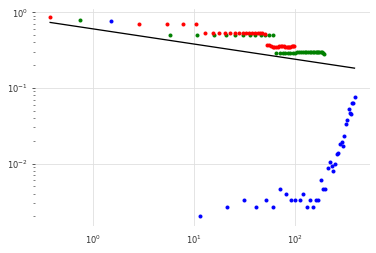

In [27]:
nvals = np.array(nvals).astype(float)

n_tpts = vals_response.shape[0]

# How does expected fraction incorrect decrease with sample size?

# plt.plot(nvals / 2,
#          0.05*(nvals / 2)**(1/2),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )
# plt.plot(nvals / 2,
#          1 - 1 /np.sqrt(nvals / 2),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )
# plt.plot(nvals,
#          #1 - np.exp(-1/np.sqrt(nvals / 2)),
#          #(1 - np.exp(-0.1*(x_scale / (0.04 / np.sqrt(nvals / 4))))) * 0.65,
#         #(1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 2)),
#          #(1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 8)),
#          #(1 - np.exp(-0.1*(x_scale / (0.04 / np.sqrt(nvals * n_tpts / 2))))) ,
# #          (1 - np.exp(-0.1*(x_scale / (200 / np.sqrt(nvals * n_tpts / 2))))) ,
#          #  (1 - np.exp(-0.1*(x_scale / (200 / np.sqrt(nvals * n_tpts / 8))))),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )


# 2 T --> 3

# (1 - np.exp(-d0 / 2)) * 
a0 = np.exp(1.16084096)
d0 = 8
a0 = .05
a0 = .02
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 8)) * (1 - (a0 * nvals / 8)**-3/2),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 4)) * (1 - (a0 * nvals / 4)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.9, 0.7)
# )
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 2)) * (1 - (a0 * nvals / 2)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.7, 0.9)
# )

# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 2)) * (1 - np.exp(a0 * nvals / 2)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.7, 0.9)
# )

# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 4)) * (1 - np.exp(a0 * nvals / 4)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.9, 0.7)
# )


# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 8)) * (1 - np.exp(a0 * nvals / 8)**-3/2),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )




# plt.plot(
#         nvals,
#         1.001*np.log(nvals),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )

# plt.plot(nvals, (10**-0.68) * nvals**0.3) 

plt.loglog(nvals / 2, 1 - all_scores_period2[:, 0], '.b')
plt.loglog(nvals / 4, 1 - all_scores_period4[:, 0], '.g')
plt.loglog(nvals / 8, 1 - all_scores_period8[:, 0], '.r')


# log(x) = 1 - y

# x = np.exp(1) * np.exp(-y)

print(np.polyfit(nvals / 8, 1 - all_scores_period8[:, 0], 1), 'r')
nvals_2 = np.arange(min(nvals / 8), max(nvals / 2))
# plt.plot(nvals_2 , 0.9 - 0.12 * np.log(nvals_2))
# plt.plot(nvals_2 , .8*(nvals_2) ** (-.04))

plt.plot(nvals_2, (30*a0 * (nvals_2)**(-1/5)))

plt.ylim([0, 1.1]);




(0.0, 1.1)

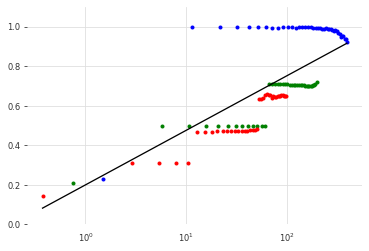

In [28]:
plt.semilogx(nvals / 2, all_scores_period2[:, 0], '.b')
plt.semilogx(nvals / 4, all_scores_period4[:, 0], '.g')
plt.semilogx(nvals / 8, all_scores_period8[:, 0], '.r')


# log(x) = 1 - y

# x = np.exp(1) * np.exp(-y)

nvals_2 = np.arange(min(nvals / 8), max(nvals / 2))
plt.plot(nvals_2 , 0.2 + 0.12 * np.log(nvals_2))

plt.ylim([0, 1.1])

# Sweep coupling strength

In [18]:
from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score

coupling_vals = np.logspace(-4, 1, 20)
n_val = 100
n_reps = 10 # number of times to replicate each point

lam_vals = [3.4, 3.5, 
3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221, 
3.59440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221]

np.random.seed(0)
lamvals = 3.81 + np.random.random(n_sys) * 0.08 * 2

import itertools
all_results = dict()
n = vals_response.shape[-1]
for params in itertools.product(np.arange(n_reps), lam_vals, coupling_vals ):
    
    rep_iter, lam_val, coupling_val = params
    rep_iter = int(rep_iter) + 737

    def xn(x, d, lam=lamvals):
        return np.mod((lam * x * (1 - x) + coupling_val * d), 1.0)

    def valnext(x, d, lam0=lam_val, noise=0.04):
        """
        Find the next value in a driven chaotic logistic map. Brownian noise is applied to
        the subsystems but not the driving signal
        """
        dn_val = lam0 * d * (1 - d)
        xn_val = xn(x, d) + noise * np.random.normal(size=x.shape)
        return xn_val, dn_val
    
    np.random.seed(rep_iter)
    sel_inds = np.random.choice(np.arange(n), n_val, replace=False)
    np.random.seed(rep_iter)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=(1 + rep_iter))
    label_vals = model.fit_predict(vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    
    score = adjusted_rand_score(true_vals, label_vals)
    
    line_val = " ".join([str(item) for item in params] + [str(score)])
    # write line to file
    
    print(line_val, flush=True)
    with open('coupling_sweep.txt', "a") as f:
        f.write(line_val + "\n")

0 3.4 0.0001 -0.0005821356790621421
0 3.4 0.00018329807108324357 -0.000605281299251612
0 3.4 0.0003359818286283781 -0.0005774905330132544
0 3.4 0.0006158482110660267 -0.000591155021492805
0 3.4 0.0011288378916846883 -0.0006074793820767223
0 3.4 0.00206913808111479 -0.0006027124575755493
0 3.4 0.00379269019073225 -0.0005787343579477992
0 3.4 0.0069519279617756054 -0.0004051037381263989
0 3.4 0.012742749857031334 0.07346153749120533
0 3.4 0.023357214690901212 0.9827421874666993
0 3.4 0.04281332398719392 0.9973351090399966
0 3.4 0.07847599703514607 0.9973351090399966
0 3.4 0.14384498882876628 0.9973355533361943
0 3.4 0.26366508987303583 0.16357402239812993
0 3.4 0.4832930238571752 0.992685978166261
0 3.4 0.8858667904100823 0.13388262866159595
0 3.4 1.623776739188721 0.18889281773854638
0 3.4 2.9763514416313193 0.9781284619631057
0 3.4 5.455594781168514 0.8254991745139378
0 3.4 10.0 0.7677266166125059
0 3.5 0.0001 -0.0014946522512917842
0 3.5 0.00018329807108324357 -0.001426187326202642
0 

KeyboardInterrupt: 

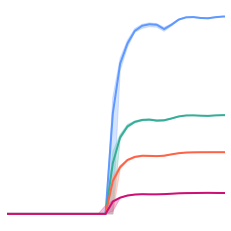

In [156]:
import pandas as pd

tt = np.loadtxt("coupling_sweep.txt")
all_data = pd.DataFrame(tt, columns=["replicate", "doubling", "coupling", "score"])


all_arrays = list()
rep_inds = np.sort(np.unique(all_data["replicate"].to_numpy()))[:-1]
all_arrays += [np.array(all_data[all_data["replicate"] == rep_ind][["doubling", "coupling", "score"]]) for rep_ind in rep_inds]
ww = pd.DataFrame(np.median(np.array(all_arrays), axis=0), columns=["doublings", "coupling", "score"])
ww["error"] = np.std(np.array(all_arrays), axis=0)[:, -1]
ww["error_lo"] = np.percentile(np.array(all_arrays), 50, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 25, axis=0)[:, -1]
ww["error_hi"] = np.percentile(np.array(all_arrays), 75, axis=0)[:, -1] - np.percentile(np.array(all_arrays), 50, axis=0)[:, -1]

double_vals = np.unique(ww["doublings"])

# plt.figure()
# plt.semilogx(ww[ww["doublings"] == double_vals[0]]["noise"],
#          ww[ww["doublings"] == double_vals[0]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[1]]["noise"],
#          ww[ww["doublings"] == double_vals[1]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[2]]["noise"],
#          ww[ww["doublings"] == double_vals[2]]["score"]
#         )
# plt.semilogx(ww[ww["doublings"] == double_vals[3]]["noise"],
#          ww[ww["doublings"] == double_vals[3]]["score"]
#         )



coupling_vals = ww[ww["doublings"] == double_vals[0]]["coupling"]
scaled_couplings = np.log10(coupling_vals * np.median(np.abs(vals_drive)) / np.median(np.abs(vals_response)))

plt.figure()
dg.plot_err(
    ww[ww["doublings"] == double_vals[0]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[0]]["error_lo"], ww[ww["doublings"] == double_vals[0]]["error_hi"]]).T,
    x=scaled_couplings,
    color=dg.blue,
    linewidth=2,
)


dg.plot_err(
    ww[ww["doublings"] == double_vals[1]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[1]]["error_lo"], ww[ww["doublings"] == double_vals[1]]["error_hi"]]).T,
    x=scaled_couplings,
    color=dg.turquoise,
    linewidth=2,
)

dg.plot_err(
    ww[ww["doublings"] == double_vals[2]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[2]]["error_lo"], ww[ww["doublings"] == double_vals[2]]["error_hi"]]).T,
    x=scaled_couplings,
    color=dg.red,
    linewidth=2,
)

dg.plot_err(
    ww[ww["doublings"] == double_vals[3]]["score"],
    # ww[ww["num_samples"] == 3]["error"],
    np.array([ww[ww["doublings"] == double_vals[3]]["error_lo"], ww[ww["doublings"] == double_vals[3]]["error_hi"]]).T,
    x=scaled_couplings,
    color=dg.magenta,
    linewidth=2,
)

plt.xlim([-2, -0.5])
dg.fixed_aspect_ratio(1)


dg.vanish_axes()
dg.better_savefig('./private_writing/fig_resources/couping_scaling.pdf')

array([-0.10462493,  1.09065149])

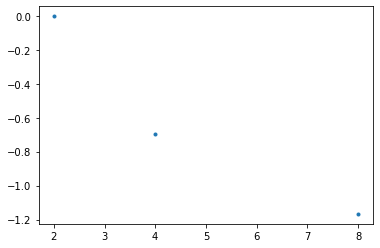

In [132]:
xx = np.array([2, 4, 8, 0.5])
yy = np.array([np.array(ww[ww["doublings"] == double_vals[i]]["score"])[70] for i in range(4)])


plt.plot(xx[:-1], np.log(yy[:-1]), '.')
np.polyfit(xx[:-1], yy[:-1], 1)

# Asymptotic error falls off as 1/T^2

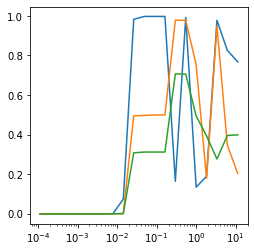

In [29]:
tt = np.loadtxt("coupling_sweep.txt")

scaled_couplings = coupling_vals * np.median(np.abs(vals_drive)) / np.median(np.abs(vals_response))
plt.semilogx(scaled_couplings, tt[:80][:20][:, -1])
plt.semilogx(scaled_couplings, tt[:80][20:40][:, -1])
plt.semilogx(scaled_couplings, tt[:80][40:60][:, -1])
# plt.plot(tt[:80][60:80][:, -1])

import degas as dg

dg.fixed_aspect_ratio(1, semilogx=True)

# Analyze connectivity and percolation

+ Dropoff in percolation indicates a unique time series solution is found
+ Spike in susceptibility indicates approach to critical state

In [63]:
# all_amats

all_lcc = list()
all_subgraph_susceptibility = list()
all_subleading_susceptibility = list()
all_sparsities = list()
all_connectivities = list()
all_centralities = list()
for amat0 in all_amats:

    amat = np.copy(amat0)

    # amat = sparsify(amat).astype(int) # otsu threshold


    amat = sparsify(amat, 0.80).astype(int) # otsu threshold

    #thresh = (np.max(amat) - np.min(amat)) / 2 + np.min(amat)
    #thresh = otsu_threshold(amat)
    # thresh = np.mean(amat)
    # amat[amat0 <= thresh] = 0
    # amat[amat0 > thresh] = 1
    # amat = amat.astype(int)

    all_sparsities.append(sparsity(amat))

    g = nx.from_numpy_matrix(amat)

    all_lcc.append(largest_connected_component(g))
    all_subgraph_susceptibility.append(susceptibility_smallcomponents(g))
    all_subleading_susceptibility.append(susceptibility_subleading(g))
    # all_connectivities.append(nx.node_connectivity(g))
    all_connectivities.append(nx.edge_connectivity(g))
    #all_centralities.append(nx.degree_centrality(g))


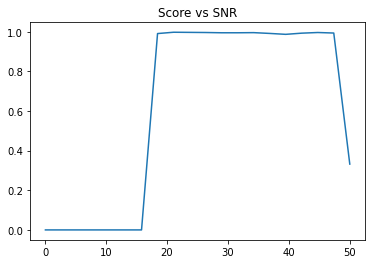

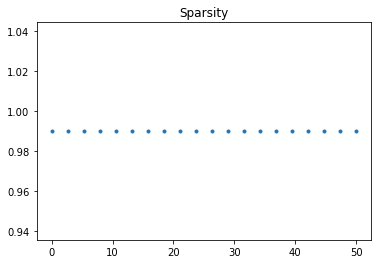

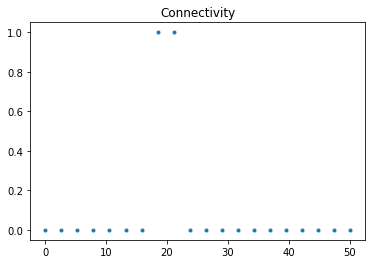

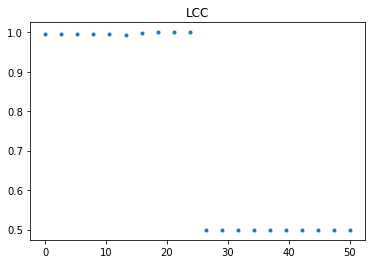

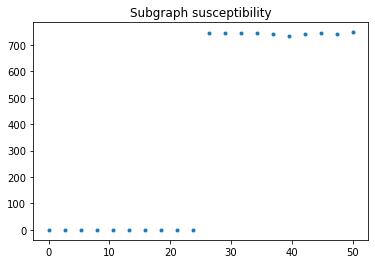

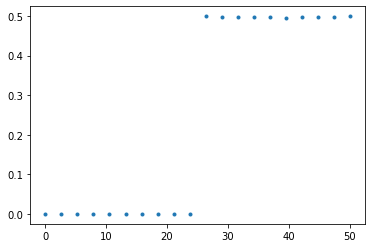

In [64]:
x_scale = np.mean(np.sqrt(np.mean(vals_response**2, axis=0)))
snr_db = 10 * np.log10(x_scale / noise_vals)

plt.figure()
plt.plot(snr_db, all_scores, '-')
plt.title("Score vs SNR")

plt.figure()
plt.plot(snr_db, all_sparsities, '.')
plt.title("Sparsity")

plt.figure()
plt.plot(snr_db, all_connectivities, '.')
plt.title("Connectivity")

# plt.figure()
# plt.plot(snr_db, all_centralities, '.')
# plt.title("Centrality")

plt.figure()
plt.plot(snr_db, all_lcc, '.')
plt.title("LCC")

plt.figure()
plt.plot(snr_db, all_subgraph_susceptibility, '.')
plt.title("Subgraph susceptibility")

plt.figure()
plt.plot(snr_db, all_subleading_susceptibility, '.')

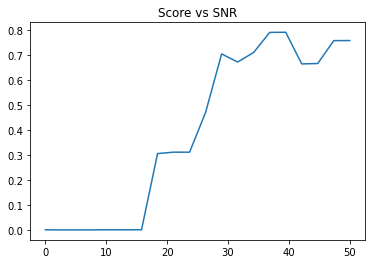

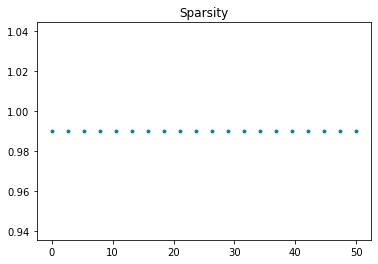

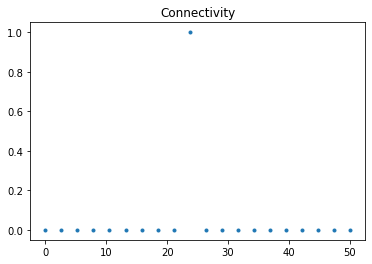

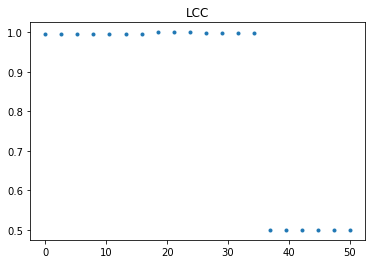

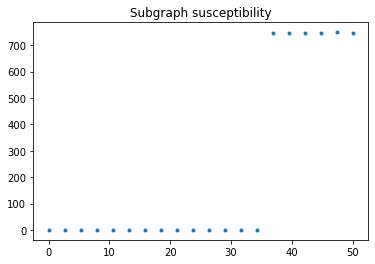

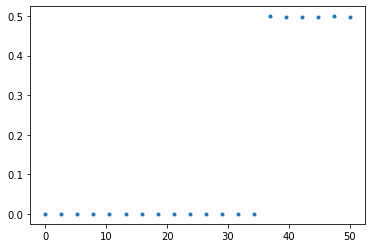

In [59]:
x_scale = np.mean(np.sqrt(np.mean(vals_response**2, axis=0)))
snr_db = 10 * np.log10(x_scale / noise_vals)

plt.figure()
plt.plot(snr_db, all_scores, '-')
plt.title("Score vs SNR")

plt.figure()
plt.plot(snr_db, all_sparsities, '.')
plt.title("Sparsity")

plt.figure()
plt.plot(snr_db, all_connectivities, '.')
plt.title("Connectivity")

# plt.figure()
# plt.plot(snr_db, all_centralities, '.')
# plt.title("Centrality")

plt.figure()
plt.plot(snr_db, all_lcc, '.')
plt.title("LCC")

plt.figure()
plt.plot(snr_db, all_subgraph_susceptibility, '.')
plt.title("Subgraph susceptibility")

plt.figure()
plt.plot(snr_db, all_subleading_susceptibility, '.')

# OLD

In [ ]:
import networkx as nx

# https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.1.013009

# track susceptibility, lcc, whether percolates or not

n = 1000
average_neighbors = 10
pmax = average_neighbors / n
cmat = np.random.random(size=(n, n))
cmat = cmat + cmat.T


def largest_connected_component(g):
    n = g.number_of_nodes()
    giant = max(nx.connected_components(g), key=len)
    lcc = len(giant) / n
    return lcc

def susceptibility_smallcomponents(g):
    n = g.number_of_nodes()
    all_components = np.array([len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)])
    return np.sum(all_components[1:]**2) / n

def susceptibility_subleading(g):
    n = g.number_of_nodes()
    all_components = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
    if len(all_components) > 1:
        return all_components[1] / n
    else:
        return 0

all_lcc = list()
all_subgraph_susceptibility = list()
all_subleading_susceptibility = list()
thresh_vals = np.linspace(0, pmax, 100)
for thresh in thresh_vals:

    # cmat[cmat < thresh] = 0
    # cmat = cmat.astype(int)
    # g = nx.from_numpy_matrix(cmat)

    g = nx.erdos_renyi_graph(n, thresh, seed=0, directed=False)

    # [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]

    all_lcc.append(largest_connected_component(g))
    all_subgraph_susceptibility.append(susceptibility_smallcomponents(g))
    all_subleading_susceptibility.append(susceptibility_subleading(g))
    


plt.figure()
plt.plot(thresh_vals, all_lcc, '.')

plt.figure()
plt.plot(thresh_vals, all_subgraph_susceptibility, '.')

plt.figure()
plt.plot(thresh_vals, all_subleading_susceptibility, '.')

Selected threshold is 0.19217636790590942
Distance matrix sparsity is is 0.950000158870873


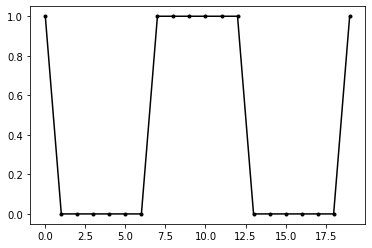

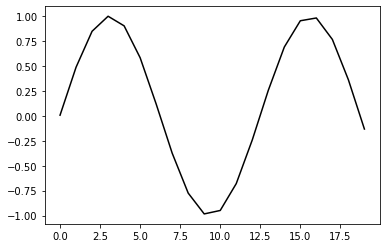

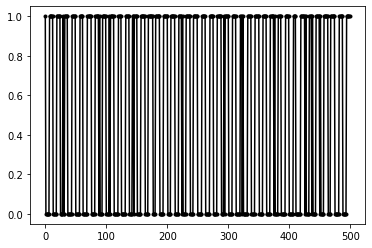

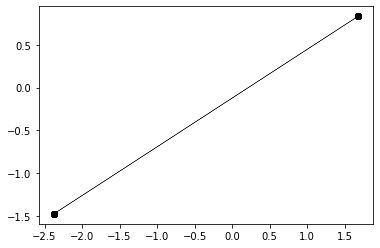

In [101]:
vals_response = np.copy(all_sol[..., 1].T)[::8]
vals_driving =  np.copy(solw)[::8]

model = RecurrenceClustering(resolution=1.0, tolerance=0.05)
model.fit(vals_response, use_sparse=False)
vals_recon = model.get_driving(vals_response)
vals_embedded = model.transform(vals_response)

traj = model.transform(vals_response)

plt.figure()
plt.plot(model.labels_[:20],'-k')
plt.plot(model.labels_[:20],'.k')

plt.figure()
plt.plot(vals_driving[:20],'-k')

plt.figure()
plt.plot(model.labels_[:500],'-k')
plt.plot(model.labels_[:500],'.k')

plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0], traj[0, :, 2], 'k', linewidth=0.4)

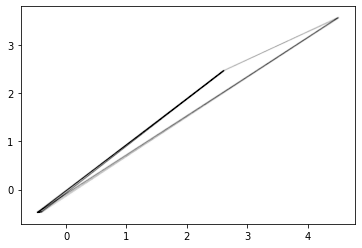

In [ ]:
plt.plot(traj[0, :, 0] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         traj[0, :, 2] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         'k', linewidth=0.001)

# Old code

Current Time:  04:32:29
Current Time:  04:32:29
Computing distance matrix... Current Time:  04:32:29
done.
Current Time:  04:32:29
Matrix sparsity is:  0.9900137741046832
Current Time:  04:32:29
Assigning pseudotime labels.
....................

Current Time:  04:32:30


Text(0.5, 1.0, 'Labels vs PCA')

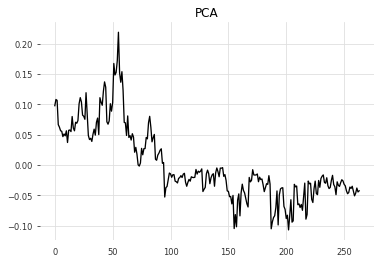

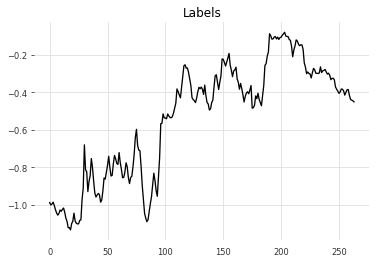

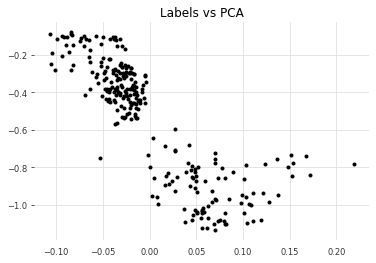

In [46]:
true_data = np.load("phytoplankton_species_abundances.pkl", allow_pickle=True)
true_data = true_data.T

# true_data += 0.01 * np.random.random(true_data.shape)

# from scipy.signal import resample, savgol_filter
# all_out = list()
# for row in true_data.T:
#     sig = resample(row, len(row) * 8)
#     sig = savgol_filter(sig, 31, 3)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T

# true_data = np.load("data_elec.pkl", allow_pickle=True)
# true_data = true_data.T[np.var(true_data, axis=0) > 0].T[:2000, :50]

model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100


from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(data_pca, label_vals0, '.k')
plt.title("Labels vs PCA")


In [47]:
import pandas as pd
from utils import nan_fill

DATA_PATH = "data/41467_2017_2571_MOESM4_ESM.xlsx"
DATA_PATH = "data/41467_2017_2571_MOESM6_ESM.xlsx"

data = pd.read_excel(DATA_PATH)
data = data.set_index("OTU")
data = data.transpose()

# Drop metadata in last row
data.drop(data.tail(1).index, inplace=True)

METADATA_PATH = "data/41467_2017_2571_MOESM10_ESM.xlsx"
metadata = pd.read_excel(METADATA_PATH)
metadata = metadata.set_index("OrdinalDay")
metadata.drop(metadata.tail(1).index, inplace=True)

for key in metadata.keys():
    metadata[key][metadata[key] == "nd"] = np.nan
    metadata[key] = nan_fill(np.array(metadata[key]))
#     try:
#         metadata[key][metadata[key] == "nd"] = None
#     except:
#         pass
#         metadata[key][np.array(metadata[key]) == "nd"] = np.nan


/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_94834/3412745788.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[key][metadata[key] == "nd"] = np.nan


In [1]:
nvals

NameError: name 'nvals' is not defined